# Clusterização - Classificação Não Supervisionada

In [1]:
import pandas as pd, numpy as np
import sklearn.cluster, sklearn.preprocessing
import matplotlib, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo o dataset mosn - Most Online Social Network
df = pd.read_csv('mosn.csv', thousands=',',
                   names=('Name', 'Description', 'Date', 'Registered Users',
                          'Registration', 'Alexa Rank'))
columns = ['Registered Users', 'Alexa Rank']
df.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0
4,aNobii,Books,2006,NaN,Open,26939.0


In [3]:
df.tail()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
204,Yammer,Social networking for office colleagues,2008,NaN,Must have company email,3622.0
205,"Yelp, Inc.",Local business review and talk,NaN,NaN,Open,186.0
206,Yookos,"General: photos, videos, blogs, games.",NaN,NaN,Open,53498.0
207,Zoo.gr,Greek web meeting point,2004,890000.0,Open,34577.0
208,Zooppa,Online community for creative talent (host of ...,NaN,60000.0,Open to people 14 and older,36373.0


In [18]:
# procurar Redes Sociais Específicas

df[df.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,1.280000e+09,Open to people 13 and older,2.0


In [22]:
# procurar Redes Sociais Específicas
df[df['Name'].isin(["Twitter", "Facebook", "Instagram"])]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,1.280000e+09,Open to people 13 and older,2.0
90,Instagram,A photo and video sharing site.,October 2010,3.000000e+08,Open to anyone 13 or older,41.0
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,6.457500e+08,Open to all ages,8.0


# Pré-processamento

In [23]:
# Elimina linhas com dados "missing" (faltosos-Nulos) e zeros
df2 = df[np.log(df[columns]).notnull().all(axis=1)].copy()
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,550000.0,Invite-only,580060.0


# Clusterização

In [24]:
# aplicar o algoritmo de clusterização
kmeans = sklearn.cluster.KMeans()
kmeans.fit(np.log(df2[columns]))
df2["Clusters"] = kmeans.labels_
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# acessando a tupla que contém o Facebook
fb = df2.set_index('Name').ix['Facebook']['Clusters']
df2.iloc[fb,:]

Name                                        Biip.no
Description                     Norwegian community
Date                                    1 June 2005
Registered Users                             430000
Registration        Requires Norwegian phone number
Alexa Rank                                    81916
Clusters                                          4
Name: 10, dtype: object

In [26]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0,0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0,1
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0,3
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0,5
6,aSmallWorld,European jet set and social elite world-wide,March 2004,550000.0,Invite-only,580060.0,2


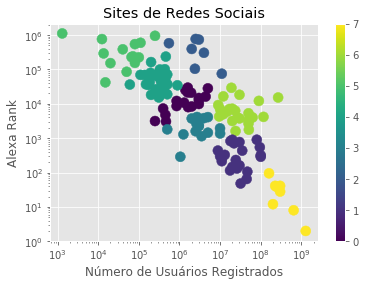

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
colors=['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f',
        '#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']

C=1

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]    # Labels of cluster 0 to 3



fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=100)

ax.set_xlabel('Número de Usuários Registrados')
ax.set_ylabel('Alexa Rank')
plt.colorbar(scatter)
plt.title("Sites de Redes Sociais")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')
#plt.figure(figsize=(18,12))
#plt.subplots(figsize=(12, 10))

#fig.show()
plt.show()

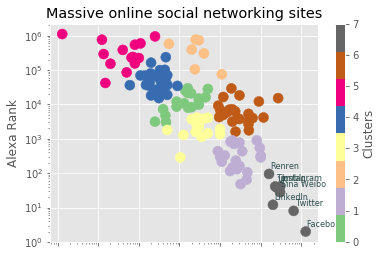

In [30]:
# Select a good-locking style
matplotlib.style.use("ggplot")

# Display the results
ax = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
                       cmap=plt.cm.Accent, s=100)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")

# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)
plt.show()

In [34]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0,0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0,1
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0,3
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0,5
6,aSmallWorld,European jet set and social elite world-wide,March 2004,550000.0,Invite-only,580060.0,2


In [36]:
# Cluster do Facebook - Cluster 7
df2[df2.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,1.280000e+09,Open to people 13 and older,2.0,7


In [37]:
# Cluster do Twitter - Cluster 7
df2[df2.Name == "Twitter"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,645750000.0,Open to all ages,8.0,7


In [38]:
# Cluster do Academia.edu - Cluster 1
df2[df2.Name == "Academia.edu"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0,1
